# N ABDUL AMEER

## Task 3 - To Explore Unsupervised Machine Learning

<p>From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.</p>


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
#iris = datasets.load_iris()
#iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
#iris_df.head() # See the first 5 rows
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring the Data

In [2]:
data.shape

(150, 6)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data=data.drop(['Id'],axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
data['Species']=Encoder.fit_transform(data['Species'])

## 2-D Scatter plot with color-coding for each flower type/class.

C:\Users\admin\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


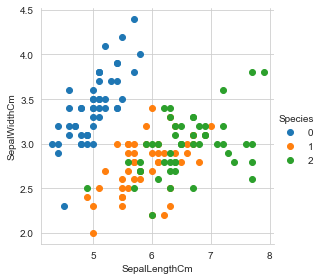

In [7]:
import seaborn as sns
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

 # Pair-plot

C:\Users\admin\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


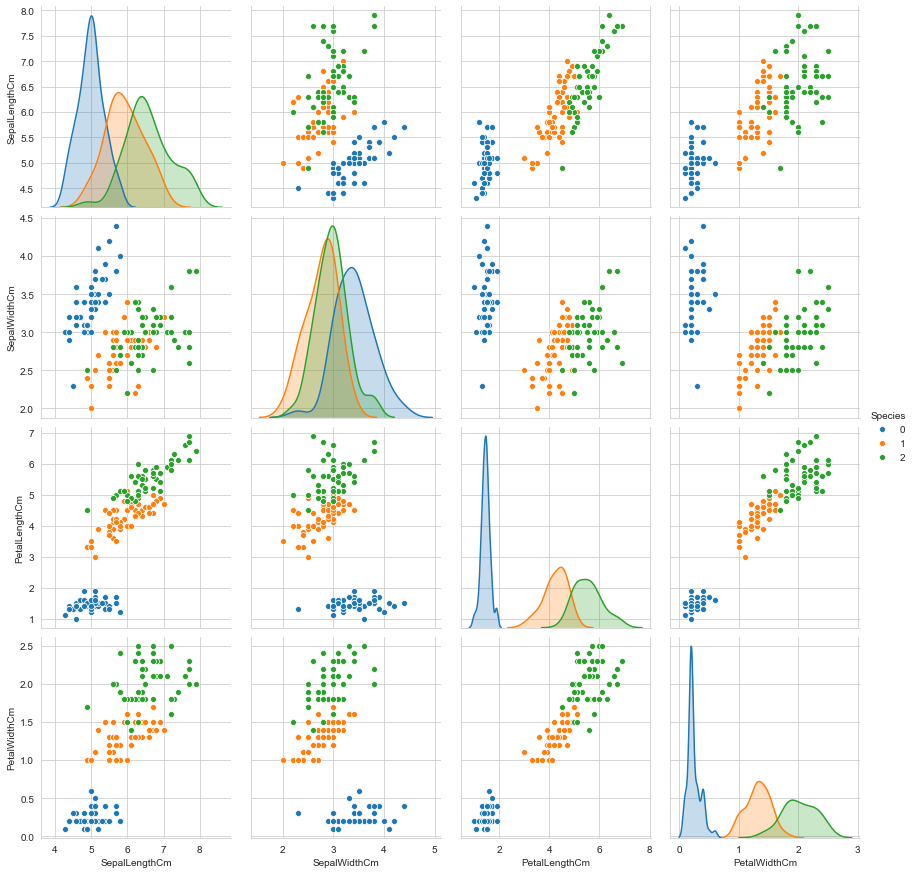

In [8]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="Species", size=3);
plt.show()

# Box Plot and Whiskers

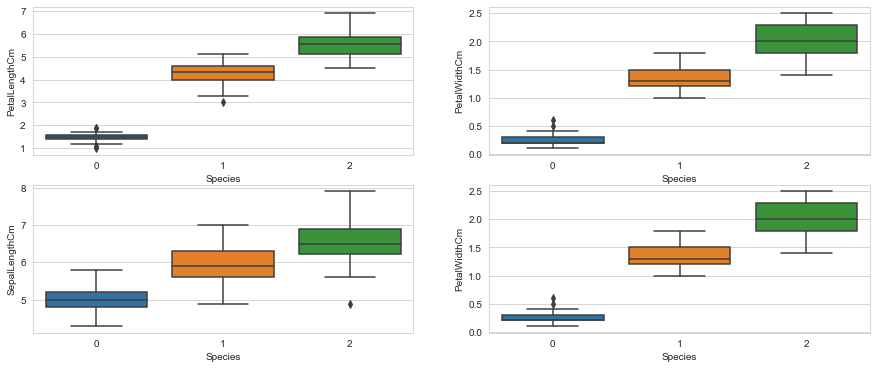

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm', data=data)

plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm', data=data)

plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm', data=data)

plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm', data=data)

# Violin plots

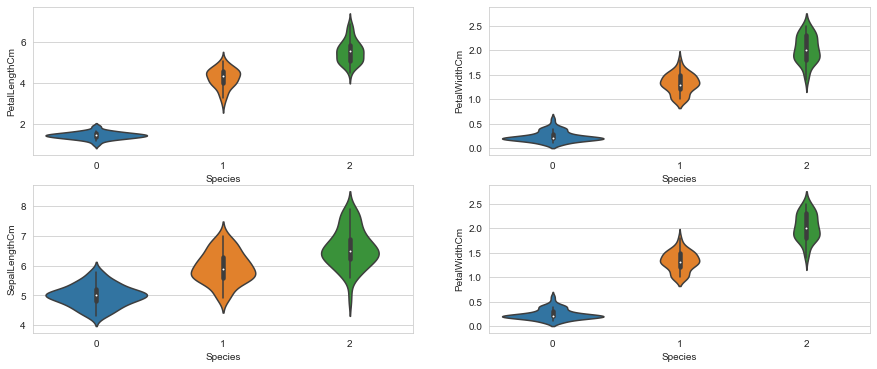

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm', data=data,size=8)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm', data=data)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm', data=data)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm', data=data)

# HeatMap

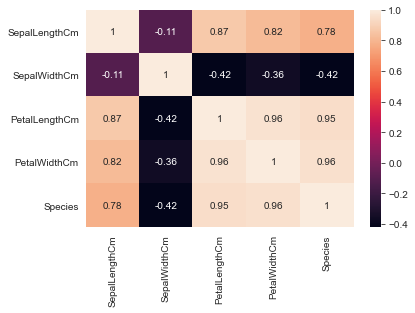

In [11]:
sns.heatmap(data.corr(),annot=True)

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

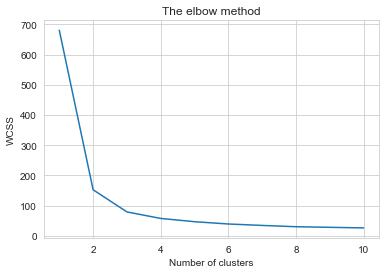

In [12]:
# Finding the optimum number of clusters for k-means classification

x = data.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [13]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

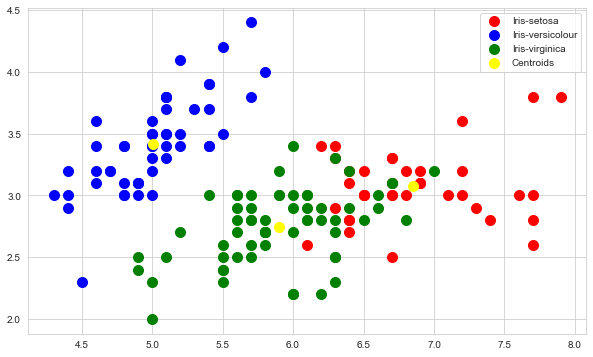

In [14]:
plt.figure(figsize=(10,6))
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [18]:
# Finding the Confusion matrix, MSE, Accuracy Score, Classification Report 
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix,classification_report
 
print('Confusion Matrix: \n')
print(confusion_matrix(y_kmeans,data.iloc[:,[4]]))
print('\nMean Absolute Error: ',mean_absolute_error(y_kmeans,data.iloc[:,[4]]))
print('\nAccuracy Score :',accuracy_score(y_kmeans,data.iloc[:,[4]]))
print('\nClassification Report:\n')
print(classification_report(y_kmeans,data.iloc[:,[4]]))

Confusion Matrix: 

[[ 0  2 36]
 [50  0  0]
 [ 0 48 14]]

Mean Absolute Error:  1.1466666666666667

Accuracy Score : 0.09333333333333334

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00        50
           2       0.28      0.23      0.25        62

    accuracy                           0.09       150
   macro avg       0.09      0.08      0.08       150
weighted avg       0.12      0.09      0.10       150



# Thank you